# Time Series Data Descriptives

## Data

In [1]:
import pandas as pd

import pandas as pd

data = {
    "Date": pd.date_range(start="2025-04-01", periods=15, freq='D'),
    "CPM": [
        4.85, 5.10, 5.02, 4.95, 5.20,
        5.08, 4.90, 5.00, 5.00, 4.98,
        5.05, 4.92, 5.15, 4.89, 4.80
    ]
}

df = pd.DataFrame(data)
print(df)

         Date   CPM
0  2025-04-01  4.85
1  2025-04-02  5.10
2  2025-04-03  5.02
3  2025-04-04  4.95
4  2025-04-05  5.20
5  2025-04-06  5.08
6  2025-04-07  4.90
7  2025-04-08  5.00
8  2025-04-09  5.00
9  2025-04-10  4.98
10 2025-04-11  5.05
11 2025-04-12  4.92
12 2025-04-13  5.15
13 2025-04-14  4.89
14 2025-04-15  4.80


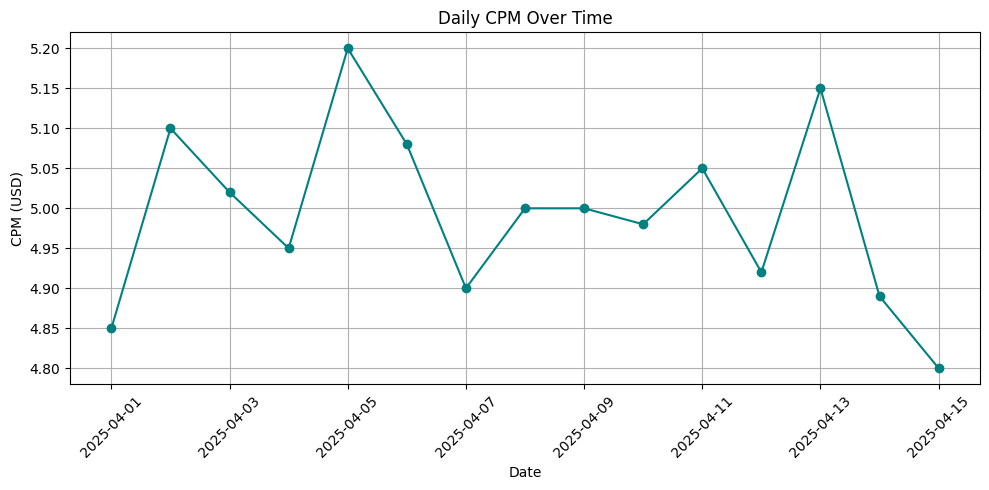

In [2]:
import matplotlib.pyplot as plt

# Plotting the CPM time series
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["CPM"], marker='o', linestyle='-', color='teal')
plt.title("Daily CPM Over Time")
plt.xlabel("Date")
plt.ylabel("CPM (USD)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Outliers

In [3]:
import numpy as np

def hampel_filter(series, window_size=3, n_sigmas=3):
    """
    Apply Hampel filter to detect outliers in a pandas Series.
    
    Parameters:
        series (pd.Series): Input data series
        window_size (int): Half-window size (total window will be 2*window_size + 1)
        n_sigmas (float): Number of MADs to use as the threshold
        
    Returns:
        outlier_indices (list): Indices of the outliers
    """
    n = len(series)
    k = 1.4826  # scale factor for Gaussian distribution
    outlier_indices = []

    for i in range(window_size, n - window_size):
        window = series[(i - window_size):(i + window_size + 1)]
        median = window.median()
        mad = k * np.median(np.abs(window - median))
        
        if mad == 0:
            continue  # avoid division by zero

        deviation = np.abs(series.iloc[i] - median)
        if deviation > n_sigmas * mad:
            outlier_indices.append(i)
    
    return outlier_indices


In [4]:
df["CPM"]

0     4.85
1     5.10
2     5.02
3     4.95
4     5.20
5     5.08
6     4.90
7     5.00
8     5.00
9     4.98
10    5.05
11    4.92
12    5.15
13    4.89
14    4.80
Name: CPM, dtype: float64

In [5]:
outliers = hampel_filter(df["CPM"])
print("Outlier indices:", outliers)
print("Outlier values:\n", df.iloc[outliers])


Outlier indices: []
Outlier values:
 Empty DataFrame
Columns: [Date, CPM]
Index: []


In [6]:
outliers

[]

In [7]:
df[df.Date == '2025-04-08']['CPM'] = 4.5

/tmp/ipykernel_29131/585624949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.Date == '2025-04-08']['CPM'] = 4.5


In [8]:
df

,Date,CPM
0,2025-04-01,4.85
1,2025-04-02,5.10
2,2025-04-03,5.02
3,2025-04-04,4.95
4,2025-04-05,5.20
5,2025-04-06,5.08
6,2025-04-07,4.90
7,2025-04-08,5.00
8,2025-04-09,5.00
9,2025-04-10,4.98


In [9]:
data2 = {
    "Date": pd.date_range(start="2025-04-01", periods=15, freq='D'),
    "CPM": range(0,15,1)
}

df2 = pd.DataFrame(data2)


In [19]:
df['CPM']

0     4.85
1     5.10
2     5.02
3     4.95
4     5.20
5     5.08
6     4.90
7     5.00
8     5.00
9     4.98
10    5.05
11    4.92
12    5.15
13    4.89
14    4.80
Name: CPM, dtype: float64

In [11]:
is_increasing = df2["CPM"].is_monotonic_increasing
is_decreasing = df2["CPM"].is_monotonic_decreasing

print("Increasing:", is_increasing)
print("Decreasing:", is_decreasing)


Increasing: True
Decreasing: False


In [12]:
df["Rolling_Mean_3"] = df["CPM"].rolling(3).mean()
df["Rolling_STD_3"] = df["CPM"].rolling(3).std()


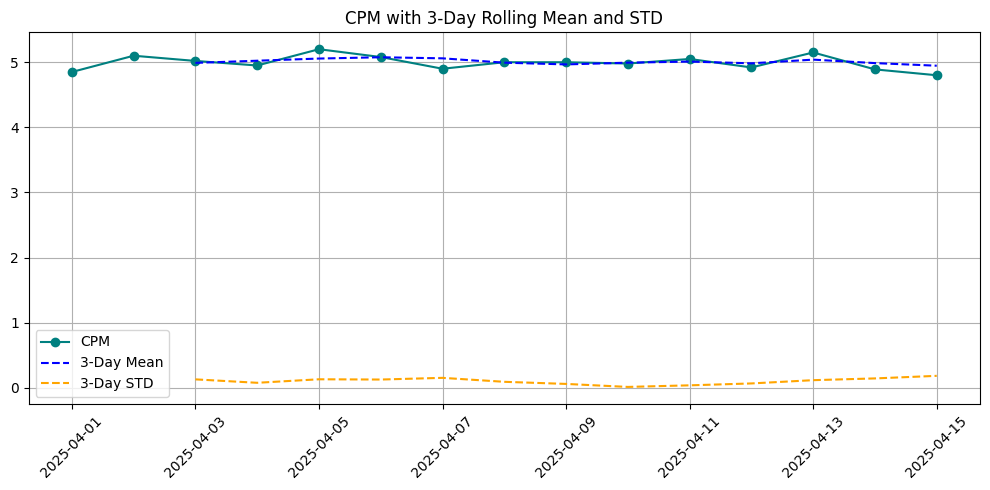

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["CPM"], label="CPM", color='teal', marker='o')
plt.plot(df["Date"], df["Rolling_Mean_3"], label="3-Day Mean", linestyle='--', color='blue')
plt.plot(df["Date"], df["Rolling_STD_3"], label="3-Day STD", linestyle='--', color='orange')
plt.legend()
plt.title("CPM with 3-Day Rolling Mean and STD")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


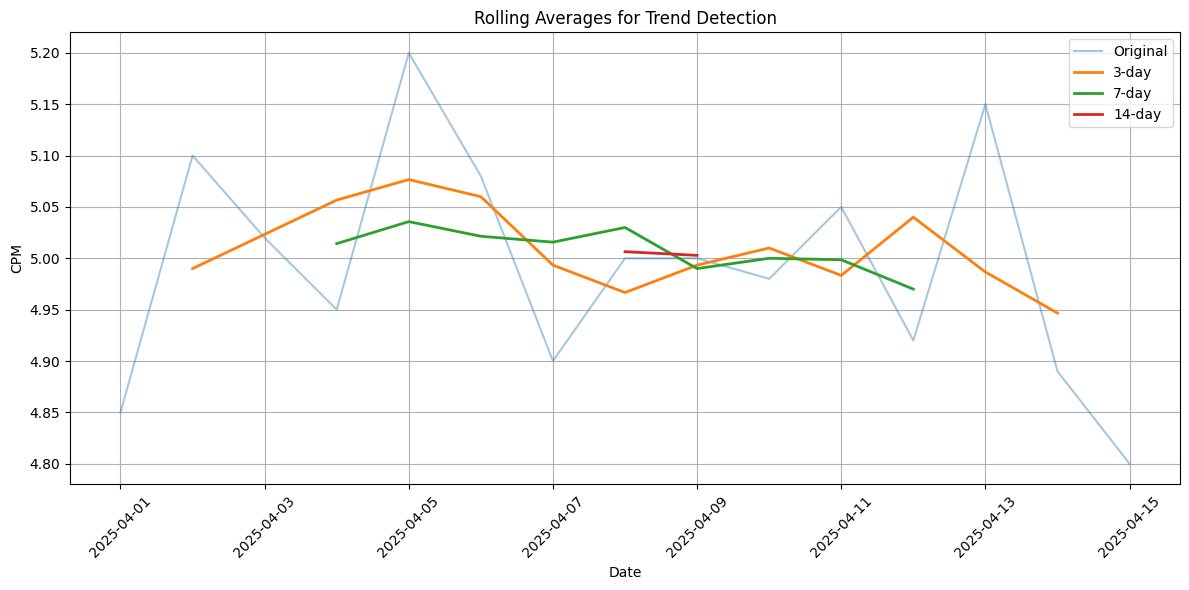

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["CPM"], label="Original", alpha=0.4)
plt.plot(df["Date"], df["CPM"].rolling(3, center=True).mean(), label="3-day", linewidth=2)
plt.plot(df["Date"], df["CPM"].rolling(7, center=True).mean(), label="7-day", linewidth=2)
plt.plot(df["Date"], df["CPM"].rolling(14, center=True).mean(), label="14-day", linewidth=2)
plt.title("Rolling Averages for Trend Detection")
plt.xlabel("Date")
plt.ylabel("CPM")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


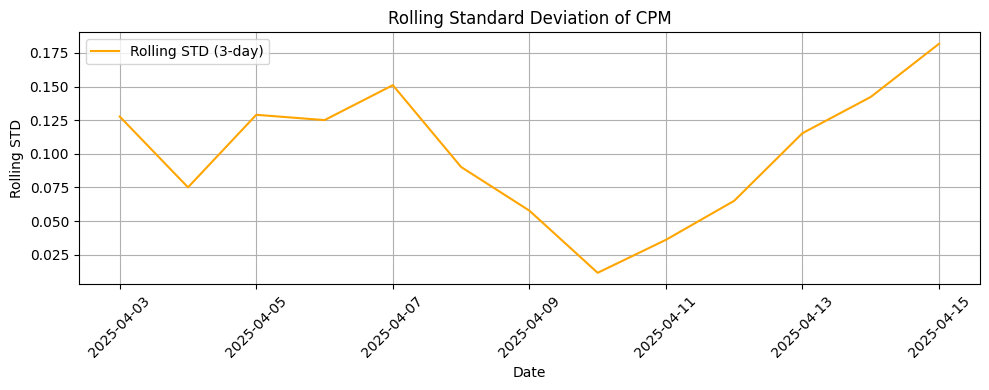

In [15]:
df["Rolling_STD_3"] = df["CPM"].rolling(3).std()

plt.figure(figsize=(10, 4))
plt.plot(df["Date"], df["Rolling_STD_3"], label="Rolling STD (3-day)", color='orange')
plt.title("Rolling Standard Deviation of CPM")
plt.xlabel("Date")
plt.ylabel("Rolling STD")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [55]:
std_stats = df["Rolling_STD_3"].describe()
print(std_stats)


count    13.000000
mean      0.100587
std       0.049302
min       0.011547
25%       0.065064
50%       0.115326
75%       0.128970
max       0.181751
Name: Rolling_STD_3, dtype: float64


In [56]:
# Step 1: Calculate Rolling STD
df["Rolling_STD_3"] = df["CPM"].rolling(window=3).std()

# Step 2: Analyze how much the rolling std itself varies
rolling_std_series = df["Rolling_STD_3"].dropna()
rolling_std_std = rolling_std_series.std()
rolling_std_mean = rolling_std_series.mean()
rolling_std_cv = rolling_std_std / rolling_std_mean  # coefficient of variation of the variation

# Step 3: Assign layman interpretation
if rolling_std_cv < 0.1:
    variability_description = (
        "The amount of fluctuation in CPM stayed very consistent throughout the period."
    )
elif rolling_std_cv < 0.25:
    variability_description = (
        "The variation in CPM was mostly steady, with only small changes in how much it fluctuated."
    )
elif rolling_std_cv < 0.5:
    variability_description = (
        "There were some noticeable changes in how much the CPM moved day to day — not totally stable."
    )
else:
    variability_description = (
        "The CPM's changed hugely over time. Some periods were calm, others were much more volatile."
    )

print(f"Rolling STD CV: {rolling_std_cv:.2f}")
print(variability_description)


Rolling STD CV: 0.49
There were some noticeable changes in how much the CPM moved day to day — not totally stable.


# Trend

In [16]:
df["Trend_3"] = df["CPM"].rolling(window=3, center=True).mean()


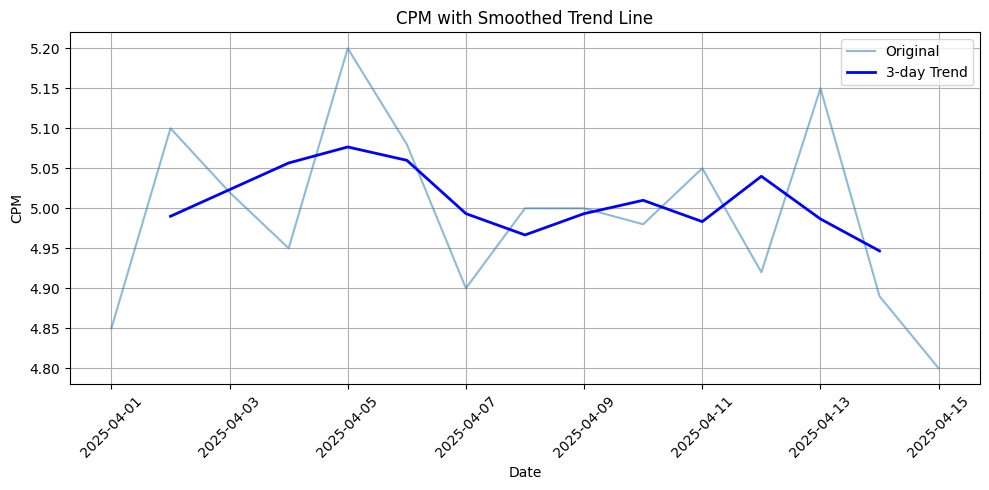

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["CPM"], label="Original", alpha=0.5)
plt.plot(df["Date"], df["Trend_3"], label="3-day Trend", linewidth=2, color='blue')
plt.title("CPM with Smoothed Trend Line")
plt.xlabel("Date")
plt.ylabel("CPM")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. If any, point out outliers
2. impute by replacing the outlier so it does not make an impact
3. Check if there are evident trends
4. check the variance thru time.

In [18]:
from langchain_ollama import ChatOllama

llm = ChatOllama(model = "deepseek-r1",
                 temperature=0)

def get_desc(json_data, ask_about):
    messages = [
        (
            "system",
            """
            You are an analyst. Your goal is to describe the trend, or if none, highlight a value that stands out.  
            You will be given monthly expense/spend data in Philippine pesos from August 2024 to December 2024 for a specific category.  

            Instructions:  
            - Provide a **straightforward and brief** insight into the trend.  
            - If no trend is clear, mention the most notable value.  
            - Include a **practical tip** for saving on {ask_about} expenses.  
            - **Do not** repeat numbers in words.  
            - Keep your response **concise and to the point**.
            """

        ),
        (
            "human",
            f"""
            Here is the data I want you to refer to: {json_data}  

            State a straightforward, brief insight & a tip on saving money related to {ask_about} expenses using the monthly data provided.
            """
        )
    ]